<a id = "top"></a>
# Presentation Prep

<a id="home"></a>

This notebook is primarily concerned with preparing models, drawing plots, compiling research, etc. in the interest of presenting my findings to a non-technical audience. The objective of this notebook is to prepare models with a focus on interpretability rather than chasing the highest R2 score or MSE, such as those submitted to Kaggle. 

#### This Notebook
- [Plotting Lasso Coefficients](#lasso)
- [Finding the Largest Coefficients](#coefs)
- [Linear Regression Modeling](#linear)

#### Other Notebooks
- [Cleaning and EDA](cleaning_and_EDA.ipynb)
- [Modeling](modeling.ipynb)
- [Additional Modeling](adtl_modeling.ipynb)
- [Predictions Demonstration](predictions_demonstration.ipynb)

#### Importing

In [880]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import PowerTransformer, StandardScaler

%matplotlib inline

In [881]:
ames = pd.read_csv("../datasets/ames.csv")

In [882]:
ames.head(3)

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,68.0,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


### Preprocessing
---

In [883]:
ames_corr = ames.corr()["saleprice"]

In [884]:
features = ames_corr[ames_corr != 1.0].index

# These "features" are not actually descriptors of the houses
features = features.drop(["pid", "id"])

ames[features].isna().sum().sum()

0

In [885]:
X = ames[features]
y = ames["saleprice"]

In [886]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 35, 
                                                    test_size = 0.25)

In [887]:
pt_X = PowerTransformer()
pt_X.fit(X_train)
X_train = pt_X.transform(X_train)
X_test = pt_X.transform(X_test)

pt_Y = PowerTransformer()
pt_Y.fit(y_train.to_frame())
y_train = pt_Y.transform(y_train.to_frame())
y_test = pt_Y.transform(y_test.to_frame())

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [888]:
# Scaling the data

ss = StandardScaler()

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

<a id = "lasso"></a>
### Plotting Lasso Coefficients
---

These plots are designed to demonstrate to a non-technical audience how lasso regression affects the coefficients of a regression model. The models and coefficients themselves are not explicitly used in the presentation.

- [Back to top](#top)

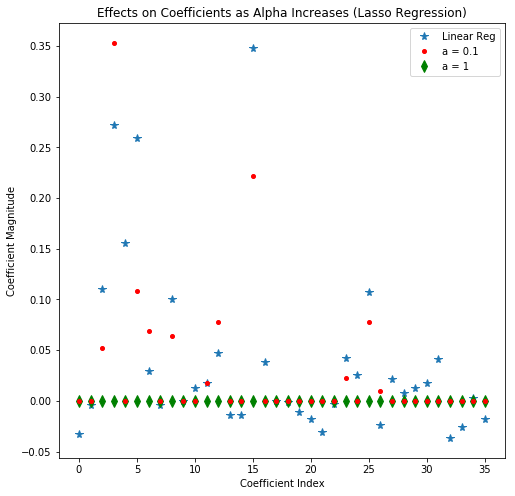

In [889]:
# This plot will show the magnitude for 

# This code is adapted from this Medium article:
# https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

plt.figure(figsize = (8,8))

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
plt.plot(lr.coef_.ravel(),
         linestyle = "none",
         marker = "*",
         markersize = 8,
         label = "Linear Reg"
        )

# Lasso Model of alpha = 0; same as Linear Regression

# lasso_model = Lasso(alpha = 0)
# lasso_model.fit(X_train_scaled, y_train)
# plt.plot(lasso_model.coef_,
#      linestyle = "none",
#      marker = "*",
#      markersize = 8,
#      label = "a = 0"
#     )

lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train_scaled, y_train)
plt.plot(lasso_model.coef_,
     linestyle = "none",
     marker = ".",
     markersize = 8,
     color = "red",
     label = "a = 0.1",
     zorder = 10
    )    

lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train_scaled, y_train)
plt.plot(lasso_model.coef_,
     linestyle = "none",
     marker = "d",
     markersize = 8,
     color = "green",
     label = "a = 1"
    )

plt.title("Effects on Coefficients as Alpha Increases (Lasso Regression)")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")

plt.legend(loc = 1)

plt.savefig("../images/lasso_coefficients.png");

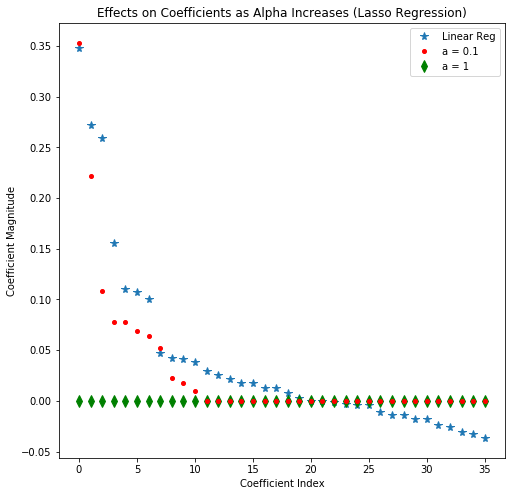

In [890]:
# Same plot but with sorted coefficients. 
# NOTE THAT THE COEFFICIENTS MAY NOT DIRECTLY
# CORRESPOND TO EACH OTHER AS THEY DO IN THE 
# FIRST PLOT. This figure should not be used 
# for direct interpretation, and instead
# should be used for visualization purposes 
# only.

plt.figure(figsize = (8,8))

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
plt.plot(np.sort(lr.coef_.ravel())[::-1],
         linestyle = "none",
         marker = "*",
         markersize = 8,
         label = "Linear Reg"
        )

# Lasso Model of alpha = 0; same as Linear Regression

# lasso_model = Lasso(alpha = 0)
# lasso_model.fit(X_train_scaled, y_train)
# plt.plot(lasso_model.coef_,
#      linestyle = "none",
#      marker = "*",
#      markersize = 8,
#      label = "a = 0"
#     )

lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train_scaled, y_train)
plt.plot(np.sort(lasso_model.coef_)[::-1],
     linestyle = "none",
     marker = ".",
     markersize = 8,
     color = "red",
     label = "a = 0.1",
     zorder = 3
    )    

lasso_model = Lasso(alpha = 1)
lasso_model.fit(X_train_scaled, y_train)
plt.plot(np.sort(lasso_model.coef_)[::-1],
     linestyle = "none",
     marker = "d",
     markersize = 8,
     color = "green",
     label = "a = 1"
    )

plt.title("Effects on Coefficients as Alpha Increases (Lasso Regression)")
plt.xlabel("Coefficient Index")
plt.ylabel("Coefficient Magnitude")

plt.legend(loc = 1)

plt.savefig("../images/lasso_coefficients_sorted.png");

<a id = "coefs"></a>
### Finding the Largest Coefficients
---

This section is for finding the largest coefficients, as narrowed down by lasso regression. The top coefficients are then taken into the next model, linear regression.

- [Back to top](#top)

In [891]:
# The enhanced dataset is read in here, such that we can model with 
# every feature available to us.

ames = pd.read_csv("../datasets/ames_plus.csv")

In [892]:
features = ames.columns.drop("saleprice")

# These features are dropped in the interest of interpretability.
# Assuming we are presenting our findings to an average homebuyer,
# they won't be able to accurately judge the overall quality of a
# house in the same way that a real estate agent might. 
features = features.drop(["overall_qual", "overall_cond"])

# testing
features = features.drop(["functional", "exter_qual"])

# Another goal is generalization. A model that uses neighborhoods
# specific to Ames, Iowa cannot be extrapolated to other cities.
features = [col for col in features if "neighborhood" not in col]

ames[features].isna().sum().sum()

0

In [893]:
len(features)

209

In [894]:
X = ames[features]
y = ames["saleprice"]

In [895]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state = 35, 
                                                    test_size = 0.25)

In [896]:
pt_X = PowerTransformer()
pt_X.fit(X_train)
X_train = pt_X.transform(X_train)
X_test = pt_X.transform(X_test)

pt_Y = PowerTransformer()
pt_Y.fit(y_train.to_frame())
y_train = pt_Y.transform(y_train.to_frame())
y_test = pt_Y.transform(y_test.to_frame())

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:122: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:2798: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [897]:
# Scaling the data

ss = StandardScaler()

ss.fit(X_train)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [898]:
# Lasso regression

# lasso = LassoCV(cv = 5)
# lasso = lasso.fit(X_train_scaled, y_train)

# manually choosing an alpha value
lasso_model = Lasso(alpha = 0.2)
lasso_model.fit(X_train_scaled, y_train)

cross_val_score(lasso_model, X_train_scaled, y_train, cv = 5).mean()

0.7682693694557019

In [899]:
# lasso.alpha_

In [900]:
lasso_coefs = lasso_model.coef_

#### Largest Lasso Coefficients

---

Pulling the coefficients from our most recent model and putting them into a data frame so we can easily see which ones have the greatest impact by sorting by absolute value. These coefficients are harder to interpret and thus may not be used directly in the presentation.

In [901]:
# lasso_coefs

In [902]:
coefs = pd.DataFrame()

coefs["feature"] = features

coefs["lasso_coefs"] = lasso_coefs

coefs["lasso_coefs_abs"] = abs(lasso_coefs)

In [903]:
coefs.sort_values(by = "lasso_coefs_abs", ascending = False).head()

,feature,lasso_coefs,lasso_coefs_abs
47,total_sq_ft,0.412194,0.412194
28,kitchen_qual,0.096531,0.096531
48,age,-0.091603,0.091603
7,bsmt_qual,0.046633,0.046633
33,garage_cars,0.045641,0.045641


In [904]:
# Percentage of the data that has been negated by Lasso Regression!

100 * ((coefs["lasso_coefs"] == 0).sum() / len(coefs["lasso_coefs"]))

95.21531100478468

In [905]:
# Select the top five features by absolute value

features = coefs.sort_values(by = "lasso_coefs_abs", ascending = False).head(5)["feature"]

In [906]:
features

47     total_sq_ft
28    kitchen_qual
48             age
7        bsmt_qual
33     garage_cars
Name: feature, dtype: object

<a id = "linear"></a>
### Linear Regression Modeling
---

This model is designed with interpretability in mind; as such these features are not scaled or transformed in any way. 

- [Back to top](#top)

In [907]:
X = ames[features]
y = ames["saleprice"]

In [908]:
mlr_model = LinearRegression()
mlr_model = mlr_model.fit(X, y)

mlr_model.score(X, y)

0.8106088549905086

In [909]:
cross_val_score(mlr_model, X, y, cv = 5).mean()

0.8095004582225671

In [910]:
coefs = pd.DataFrame()

coefs["feature"] = features

coefs["mlr_coefs"] = mlr_model.coef_

In [911]:
coefs

,feature,mlr_coefs
47,total_sq_ft,56.675486
28,kitchen_qual,30395.625164
48,age,-282.355827
7,bsmt_qual,4995.360010
33,garage_cars,13276.081937


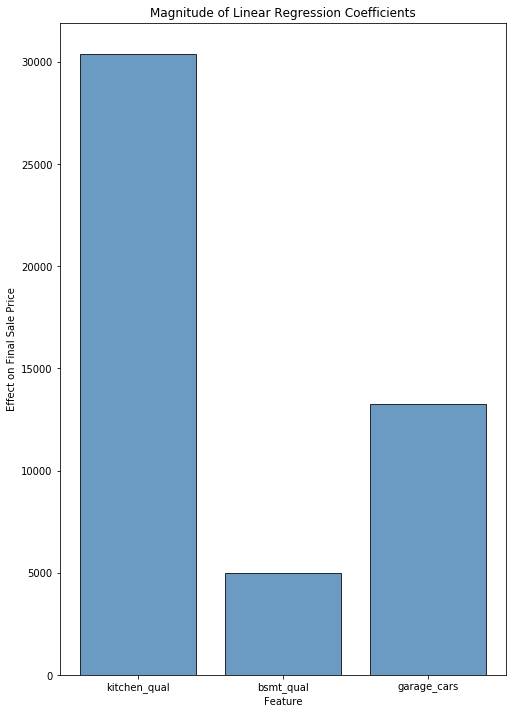

In [912]:
plt.figure(figsize = (8, 12))
plt.bar(coefs[coefs["mlr_coefs"] > 200.0]["feature"], 
        coefs[coefs["mlr_coefs"] > 200.0]["mlr_coefs"],
        color = "steelblue",
        edgecolor = "k",
        alpha = 0.8
       )

plt.title("Magnitude of Linear Regression Coefficients")
plt.xlabel("Feature")
plt.ylabel("Effect on Final Sale Price")

plt.savefig("../images/coefs_bar_1.png");

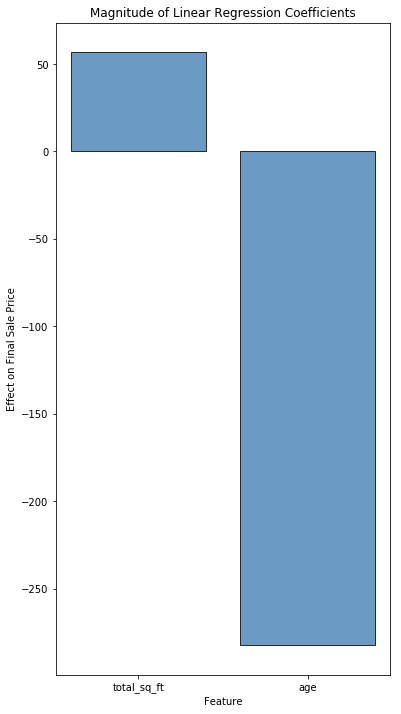

In [913]:
plt.figure(figsize = (6, 12))
plt.bar(coefs[coefs["mlr_coefs"] < 200.0]["feature"], 
        coefs[coefs["mlr_coefs"] < 200.0]["mlr_coefs"],
        color = "steelblue",
        edgecolor = "k",
        alpha = 0.8
       )

plt.title("Magnitude of Linear Regression Coefficients")
plt.xlabel("Feature")
plt.ylabel("Effect on Final Sale Price")

plt.savefig("../images/coefs_bar_2.png");

In [914]:
# This function is expanded upon in the Prediction Demonstrations notebook.

def make_prediction(sq_ft, age, kit, bsmt, cars):
    
    df = pd.DataFrame({
        "total_sq_ft": [sq_ft],
        "age": [age],
        "kitchen_qual": [kit],
        "bsmt_qual": [bsmt],
        "garage_cars": [cars]
    })
    print("Your dream home will cost only", int(mlr_model.predict(df)), "dollars!")

In [915]:
# Finding the price of Jimmy's house!

make_prediction(2000, 5, 3, 3, 2)

Your dream home will cost only 206299 dollars!


In [916]:
intercept = mlr_model.intercept_

In [917]:
mlr_model.coef_

array([   56.67548555, 30395.62516387,  -282.35582703,  4995.36001   ,
       13276.08193661])

In [918]:
# Finding out how old Jimathy's house will be!

ph = ((56.67548555 * 5000) + (30395.62516387 * 5) + (4995.36001 * 5) + (13276.08193661 * 5) + intercept + 206299)
ph / -282.35582703

-2242.882792132613

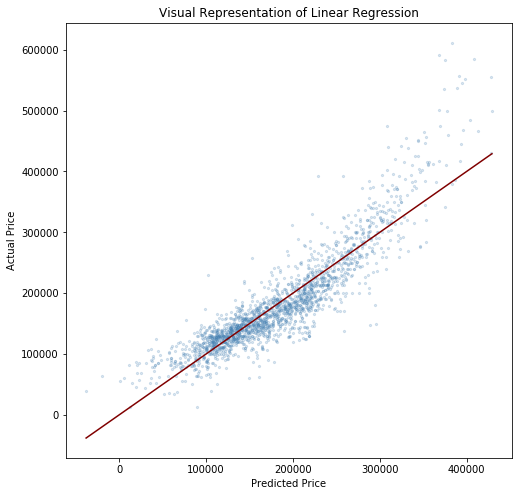

In [921]:
predictions = mlr_model.predict(X)

plt.figure(figsize = (8,8))

plt.scatter(predictions, 
            y,
            s = 5,
            alpha = 0.2,
            color = "steelblue"
           )

plt.plot([np.min(predictions), np.max(predictions)],
         [np.min(predictions), np.max(predictions)],
         color = "maroon",
         zorder = 10
        )

plt.title("Visual Representation of Linear Regression")
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")

plt.savefig("../images/lin_reg_viz.png");

---
- [Back to top](#top)